# Scipy를 이용한 기초 검정

In [1]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

- 이항 검정 (Binomial test)
- 카이 제곱 검정 (Chi-square test)
- 단일 표본 z-검정 (One-sample z-test)
- 단일 표본 t-검정 (One-sample t-test)
- 독립 표본 t-검정 (Independent-two-sample t-test)
- 대응 표본 t-검정 (Paired-two-sample t-test)
- 분산 검정 (Chi squared variance test)
- 등분산 검정 (Equal-variance test)
- 정규성 검정 (Normality test)

## 이항 검정 `binom_test`

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom_test.html

- 이항 분포를 사용해서 베르누이 분포 모수에 대한 가설을 조사  
- `binom_test` 명령 사용
- 디폴트 귀무 가설 $\theta = 0.5$

In [4]:
# 데이터 10개, theta = 0.5
N = 10
theta_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x)
n

7

In [5]:
sp.stats.binom_test(n, N)

0.34374999999999989

In [6]:
# 데이터 100개, theta = 0.5
N = 100
theta_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x)
n

49

In [7]:
sp.stats.binom_test(n, N)

# p-value 92%이므로, 귀무가설 기각할 수 없다.

0.92041076261282062

In [13]:
# 데이터 100개, theta =0.35
N = 100
theta_0 = 0.35
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x)
n

32

In [14]:
sp.stats.binom_test(n, N)

# p-value 0.04%이므로 귀무가설 기각할 수 있다. theta는 0.5가 아니다.

0.00040877716742681512

## 카이제곱 검정 `chisquare`
**goodness of fit**이라고도 부른다. 

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

- 카테고리 분포의 모수에 대한 가설을 조사하는 검정 방법.
- 카테고리 k가 나와야할 횟수의 기댓값 $m_k$와 실제 나온 횟수 $x_k$의 차이를 이용한다.

$$\sum_{k=1}^K \dfrac{(x_k - m_k)^2}{m_k^2}$$

- 디폴트 귀무가설 $\theta = \left(\frac{1}{K}, \ldots, \frac{1}{K} \right)$

In [16]:
# 데이터 갯수  N=10 , 실제 모수  theta_0=(0.25,0.25,0.25,0.25) 인 경우

N = 10
K = 4
theta_0 = np.ones(K)/K
np.random.seed(0)
x = np.random.choice(K, N, p=theta_0)
n = np.bincount(x, minlength=K)
n

array([0, 3, 5, 2])

In [17]:
sp.stats.chisquare(n)

# p-value 17.8% 이므로 귀무가설 기각할 수 없다.
# 따라서 실제 모수를 따라간다.

Power_divergenceResult(statistic=5.1999999999999993, pvalue=0.157724450396663)

In [18]:
#데이터 갯수  N=100, 실제 모수  theta_0=(0.35,0.30,0.20,0.15) 인 경우.

N = 100
K = 4
theta_0 = np.array([0.35, 0.30, 0.20, 0.15])
np.random.seed(0)
x = np.random.choice(K, N, p=theta_0)
n = np.bincount(x, minlength=K)
n

array([37, 32, 20, 11])

In [19]:
sp.stats.chisquare(n)

# p-value  0.08%이므로 귀무가설 기각할 수 있다.
# theta_0=(0.35,0.30,0.20,0.15)가 아니다.

Power_divergenceResult(statistic=16.559999999999999, pvalue=0.00087034719789121269)

## 단일 표본 z-검정 `norm`

(One-sample z-test)

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

- 분산의 값을 정확히 아는 정규 분포의 표본에 대한 기대값 조사
- `norm`과 `cdf`를 이용하여 구함.


#### 데이터 수가 매우 부족하여, 결과가 오류인 경우, 유형 1 오류 (Type 1 Error) 라고 한다.

## 단일 표본 t-검정 `ttest_1samp`

(One-sample t-test)

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

- 정규분포의 표본에 대해 기대값을 조사하는 방법
- `ttest_1samp`명령을 사용한다.
- 디폴트 모수가 없으므로 `popmean`으로 직접 지정

Ttest_1sampResult(statistic=2.2894396723896699, pvalue=0.047818464908570578)


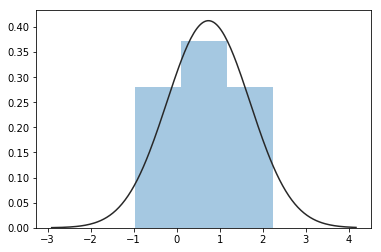

In [25]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
print(sp.stats.ttest_1samp(x, popmean=0))
plt.show()

# 유의 확률 4%, 하지만 Type 1 error

Ttest_1sampResult(statistic=0.59042834028516977, pvalue=0.55624891586946745)


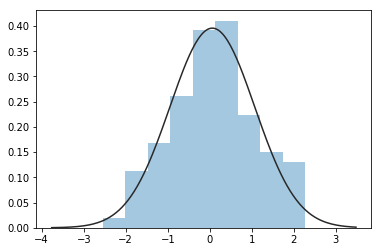

In [23]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
print(sp.stats.ttest_1samp(x, popmean=0))
plt.show()

# 유의 확률 55.62%

## 독립 표본 t-검정 `ttest_ind`

(Independent-two-sample t-test)

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

- 두 개의 독립적인 정규분포의 두 데이터셋을 사용
- 두 정규 분포의 기대값이 동일한지 검사
- 두 정규 분포의 분간 값이 같고 다르고에 따라 , 검정 통계량이 다르기 때문에, `equal_var`인수를 사용하여 지정

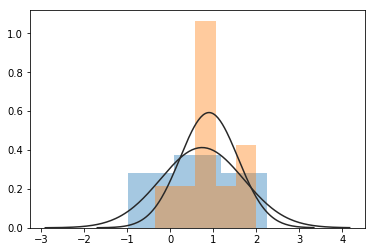

In [26]:
# 기대값이 다르고, 분산과 샘플의 수는 같은 경우

N_1 = 10; mu_1 = 0; sigma_1 = 1
N_2 = 10; mu_2 = 0.5; sigma_2 = 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

In [27]:
sp.stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=-0.41399685269886549, pvalue=0.68376768941164268)

기대값이 다름에도, p-value가 작기 때문에 귀무 가설을 기각할 수 없다. 
- Type 2 Error

데이터 수가 증가하면 오류 발생 가능성도 줄어든다.

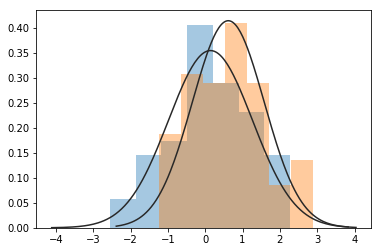

In [28]:
N_1 = 50; mu_1 = 0; sigma_1 = 1
N_2 = 100; mu_2 = 0.5; sigma_2 = 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

In [30]:
sp.stats.ttest_ind(x1, x2, equal_var=True)

# p-value가 낮기 때문에, 귀무가설 기각한다.

Ttest_indResult(statistic=-2.6826951236616963, pvalue=0.0081339709157226582)

## 대응 표본 검정 `ttest_rel`

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

- 두 정규 분포의 기대값이 같은지 확인하기 위한 검정
- 대응하는 정보를 알고 있다면, 샘플 간의 차이의 영향을 없앨 수 있으므로, 영향을 보다 정확하게 추정 가능.

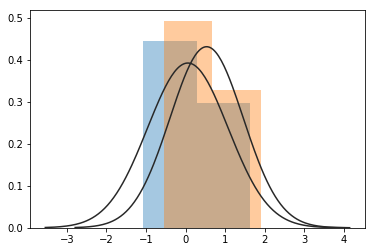

In [31]:
# 평균이 달라진 경우, N = 5

N = 5
mu_1 = 0
mu_2 = 0.5
np.random.seed(1)
x1 = sp.stats.norm(mu_1).rvs(N)
x2 = x1 + sp.stats.norm(mu_2, 0.1).rvs(N)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

In [33]:
sp.stats.ttest_rel(x1, x2)

# 두 데이터의 평균이 다르다.
# 정확도 p-value = 0.2%

Ttest_relResult(statistic=-7.1723380661732756, pvalue=0.0020008849290622677)

## 카이 제곱 분산 검정 `chi2`

정규 분포의 분산.
- 샘플 분산 값을 정규화 $\rightarrow$ 카이 제곱 분포를 따른다.

In [34]:
def chi2var_test(x, sigma2=1):
    v = x.var(ddof=1)
    t = (len(x) - 1)*v/sigma2
    return t, sp.stats.chi2(df=len(x)-1).sf(np.abs(t))

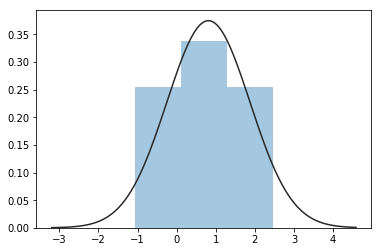

1.0637871321863899

In [35]:
N = 10
mu_0 = 0
sigma_0 = 1.1
np.random.seed(0)
x = sp.stats.norm(mu_0, sigma_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()
x.std()

In [36]:
chi2var_test(x)

(11.316430626053437, 0.25464123584764542)

## 등분산 검정 `bartlett` `flinger` `levene`

- scipy.stats.bartlett
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html
- scipy.stats.fligner
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fligner.html
- scipy.stats.levene
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

두 정규 분포로부터 생성된 두 개의 데이터 집합에서, 두 정규 분포의 분산 모수가 같은지 확인하는 검정

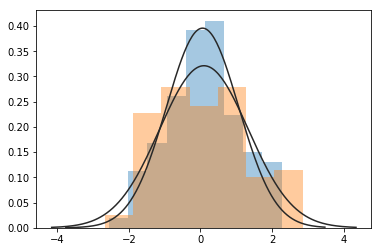

(1.0078822447165796, 1.2416003969261071)

In [37]:
N1 = 100
N2 = 100
sigma_1 = 1
sigma_2 = 1.2
np.random.seed(0)
x1 = sp.stats.norm(0, sigma_1).rvs(N1)
x2 = sp.stats.norm(0, sigma_2).rvs(N2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()
x1.std(), x2.std()

In [38]:
sp.stats.bartlett(x1, x2)

BartlettResult(statistic=4.2534738372322662, pvalue=0.039170128783651344)

In [39]:
sp.stats.fligner(x1, x2)

FlignerResult(statistic=7.2248419904094572, pvalue=0.0071901501067483673)

In [40]:
sp.stats.levene(x1, x2)

LeveneResult(statistic=7.6807089476794372, pvalue=0.0061135154970207925)

# 정규성 검정 (normality test)

(매우 중요) 회귀분석에서 확률분포가 가우시안 정규분포를 따르는지 확인

### statsmodels 정규성 검정 명령어

- Omnibus Normality test
- `statsmodels.stats.stattools.omni_normtest`
http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.stattools.omni_normtest.html  



- Jarque–Bera test
- `statsmodels.stats.stattools.jarque_bera`
http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.stattools.jarque_bera.html  


- Kolmogorov-Smirnov test
- `statsmodels.stats.diagnostic.kstest_normal`
http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.diagnostic.kstest_normal.html  


- Lilliefors test
- `statsmodels.stats.diagnostic.lillifors`
http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.diagnostic.lillifors.html


### SciPy 정규성 검정 명령어


- Kolmogorov-Smirnov test
- `scipy.stats.ks_2samp`
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html  


- Shapiro–Wilk test
- `scipy.stats.shapiro`
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html  


- Anderson–Darling test
- `scipy.stats.anderson`
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html  


- D'Agostino's K-squared test
- `scipy.stats.mstats.normaltest`
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.normaltest.html


- 이 중에서 Kolmogorov-Smirnov 검정은 사실 정규 분포에 국한되지 않음
- 두 샘플이 같은 분포를 따르는지 확인할 수 있는 방법.

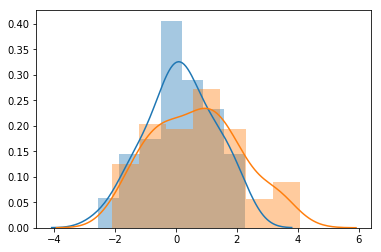

In [42]:
np.random.seed(0)
N1 = 50
N2 = 100
x1 = sp.stats.norm(0, 1).rvs(N1)
x2 = sp.stats.norm(0.5, 1.5).rvs(N2)
sns.distplot(x1)
sns.distplot(x2)
plt.show()

In [44]:
sp.stats.ks_2samp(x1, x2)

# p-value 4.95% 

Ks_2sampResult(statistic=0.23000000000000004, pvalue=0.049516112814422863)